<p><font size="6" color='grey'> <b>
Python meets ChatGPT
</b></font> </br></p>

<p><font size="5" color='grey'> <b>
Projekt Visualize App
</b></font> </br></p>


---

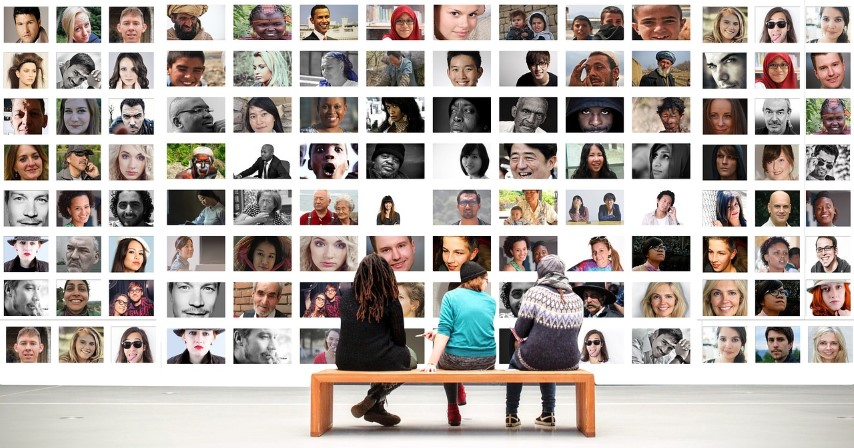

Bild von <a href="https://pixabay.com/de/users/geralt-9301/?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=2944065">Gerd Altmann</a> auf <a href="https://pixabay.com/de//?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=2944065">Pixabay</a>

# 1 | Projektauftrag
---

**Ziel:**

Entwicklung einer App, mit der Benutzer Datensätze hochladen und verschiedene Arten von Visualisierungen erstellen kann.
Nutzen Sie Gradio für die Benutzeroberfläche, Pandas für die Datenmanipulation und Plotly für die Visualisierung.


**Hauptaufgaben:**

+ Implementierung einer Funktion zum Hochladen von CSV- oder Excel-Dateien.
+ Bereitstellung von Optionen für verschiedene Visualisierungstypen (z.B. Balkendiagramme, Liniendiagramme, Scatterplots).
+ Anzeige der erstellten Visualisierungen in der Gradio-App.

Bitte die `public URL` nach Erstellung und Test veröffentlichen.

# 2 | Lösungsvorschlag
---

In [ ]:
!pip install -q gradio

In [ ]:
import pandas as pd
import plotly.express as px
import gradio as gr

In [ ]:
def visualize_data(file, plot_type):
    # Lese den Datensatz ein
    df = pd.read_csv(file)

    # Erstelle verschiedene Arten von Visualisierungen basierend auf der Benutzerauswahl
    if plot_type == "Balkendiagramm":
        fig = px.bar(df, x=df.columns[0], y=df.columns[1])
    elif plot_type == "Liniendiagramm":
        fig = px.line(df, x=df.columns[0], y=df.columns[1])
    elif plot_type == "Streudiagramm":
        fig = px.scatter(df, x=df.columns[0], y=df.columns[1])
    else:
        fig = px.pie(df, values=df.columns[1], names=df.columns[0])

    # Rückgabe der Visualisierung
    return fig

In [ ]:
# Definiere die Gradio-Benutzeroberfläche
with gr.Blocks() as app:
    gr.Markdown("## Datenvisualisierungs-Tool")

    with gr.Row():
        file_input = gr.File(label="Lade deinen Datensatz hoch (CSV-Format)")
        plot_type = gr.Radio(choices=["Balkendiagramm", "Liniendiagramm", "Streudiagramm", "Kreisdiagramm"], label="Wähle den Visualisierungstyp", value="Balkendiagramm")

    output_plot = gr.Plot(label="Visualisierung")

    gr.Button("Visualisieren").click(visualize_data, inputs=[file_input, plot_type], outputs=output_plot)

In [ ]:
# Starte die Gradio-App
app.launch()

# 3 | Deployment
---

In [ ]:
#@title
#@markdown   <p><font size="4" color='green'>  .py-Datei erstellen</font> </br></p>
# %%writefile app.py
